<a href="https://colab.research.google.com/github/Tamrika/Deep-Learning/blob/main/Median_house_value_prediction_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Implementing the Learning Algorithm using tensorflow

1.1 Importing Packages

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

Parameter Initialization

In [ ]:
"""
nx is the number of neurons in the input layer (i.e., the number of features in the dataset)
nh is the number of neurons in the hidden layer 
ny is the number of neurons in the output layer (For this example we are using one nueron in the output layer so ny=1)
"""
def initialize_parameters(nx,nh,ny):
    #set tensorflow global random seed
    tf.random.set_seed(1)

    #initialize weights to small random numbers and biases to zeros for each layer. Note that weights and biases are defined as tensorflow variables instead of numpy arrays
    W1=tf.Variable(tf.random.uniform(shape=(nh,nx), minval=-0.01, maxval=0.01), name="W1")
    b1=tf.Variable(tf.zeros(shape=(nh,1),name="b1" ))
    W2=tf.Variable(tf.random.uniform(shape=(ny,nh), minval=-0.01, maxval=0.01), name="W2")
    b2=tf.Variable(tf.zeros(shape=(ny,1), name="b2"))
   
    #create a dictionary of network parameters
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

Forward Pass

In [ ]:
"""
In forward pass we do the computations in the computational graph. We cache the intermediate nodes we will later need in the backward pass
"""
def forward_pass(parameters,X):
    #the input image is read as an integer, use tf.cast to cast it to float before using it in fowrard pass computation.
    #X= tf.cast(X, tf.float32) 
    #print("debugging:::",parameters) 
    Z1= tf.matmul(parameters["W1"],X)+ parameters["b1"] # b1 is broadcasted n times before it is added to 
    A1=tf.nn.relu(Z1)
    Z2=tf.matmul(parameters["W2"],A1)+parameters["b2"] #b2 is broadcasted n times before it is added to np.dpt(W2,A1)
    
    Yhat=Z2
       
    return Yhat


Compute Loss

In [ ]:
"""
n is the number of examples, y is a vector of actual/observed outputs and yhat is a vector of predicted outputs
""" 
def compute_loss(Y,Yhat):
    mse = tf.keras.losses.MeanSquaredError()
    loss = mse(Y, Yhat)
    return loss

Backward pass

In [ ]:
def backward_pass(parameters, loss, tape):
    gradients= tape.gradient(loss,parameters)
    return gradients
    

Update Parameters

In [ ]:
def update_parameters(parameters, gradients, learning_rate):
    parameters["W1"].assign_sub(learning_rate*gradients["W1"])
    parameters["W2"].assign_sub(learning_rate*gradients["W2"])
    parameters["b1"].assign_sub(learning_rate*gradients["b1"])
    parameters["b2"].assign_sub(learning_rate*gradients["b2"])
    return parameters

Creating the Neural Network Model

In [ ]:
"""
Arguments: train_X: is the training dataset (features)
           train_Y: is the vector of labels for training_X
           val_X: is the vector of validation dataset (features)
           val_y: is the vector of labels for val_X
           nh: is the number of neurons in the hidden layer
           num_iterations: The number of iterations of gradient descent
"""
def create_nn_model(train_X,train_Y,nh, val_X, val_Y, num_iterations, learning_rate):
    """
    Do some safety check on the data before proceeding. 
    train_X and val_X must have the same number of features (i.e., same number of rows)
    train_X must have the same number of examples as train_Y (i.e., same number of columns )
    val_X must have the same number of examples as Val_Y
    """ 
    #tf.enable_eager_execution()
    assert(train_X.shape[0]==val_X.shape[0]), "train_X and val_X must have the same number of features"
    assert(train_X.shape[1]==train_Y.size), "train_X and train_Y must have the same number of examples"
    assert(val_X.shape[1]==val_Y.size), "val_X and val_Y must have the same number of examples" 
    
    
    #getting the number of features
    nx=train_X.shape[0]
    
    # We want to use this network for binary classification, so we have only one neuron in the output layer with a sigmoid activation
    ny=1
    
    # initializing the parameteres
    parameters=initialize_parameters(nx,nh,ny)
    
    
    #initialize lists to store the training and valideation losses. 
    val_losses=[]
    train_losses=[]
    
    #run num_iterations of gradient descent
    for i in range (0, num_iterations):
      
      """
        run forward pass and compute the loss function on training and validation data. 
        Note that the forward pass and loss computations on the training data are enclosed inside the gradient tape context in order to build the computational graph.
        The gradients are only computed on the training data and used to update the parameter. Validation data is not used for training and updating the parameters.
        """
      
      with tf.GradientTape() as tape:
        #run the forward pass on train_X
        train_Yhat=forward_pass(parameters,train_X)
        #compute the train_loss
        train_loss=compute_loss(train_Y,train_Yhat)


       #compute validation loss
      Yhat_val= forward_pass(parameters,val_X)
      val_loss=compute_loss(val_Y,Yhat_val)
        
      
      #print the trianing loss and validation loss for each iteration.
      print("iteration {} :train_loss:{} val_loss{}".format(i,train_loss,val_loss))

       # append the train and validation loss for the current iteration to the train_losses and val_losses 
      train_losses.append(train_loss)
      val_losses.append(val_loss)
     
      """
      Compute the gradients and update the parameters
      """    
      #compute the gradients on the training data
      gradients=backward_pass(parameters,train_loss,tape)

      # update the parameters
      parameters=update_parameters(parameters, gradients, learning_rate)

    
    
    #create a dictionary history and put train_loss and validaiton_loss in it
    history={"val_loss": val_losses,
             "train_loss": train_losses}
        
        
    #return the parameters and the history
    return parameters, history
        
        
    
    

predicting and evaluating the NN model

In [ ]:
def predict(parameters,X):
    Yhat=forward_pass(parameters, X) 
    print(Yhat)
    return Yhat

Mean Absolute Percentage Error for accuracy

In [ ]:
def MAPE(observedY,predictedY):
    mape = tf.keras.losses.MeanAbsolutePercentageError()
    mape_out = mape(observedY, predictedY)
    return mape_out

In [ ]:
def plotLearningCurve():
  plt.plot(range(0,iterations),history["train_loss"],'b')
  plt.plot(range(0,iterations),history["val_loss"],'r')
  plt.ylabel('loss')
  plt.xlabel('iterations')
  plt.show()

#2. Preparing California Housing Data



In [ ]:
# reading the input datasets train.csv and validation.csv 
cal_housing_train = pd.read_csv("sample_data/california_housing_train.csv")
cal_housing_test = pd.read_csv("sample_data/california_housing_test.csv")
print(cal_housing_train.shape)
print(cal_housing_test.shape)

(17000, 9)
(3000, 9)


In [ ]:
cal_housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Separated the features from labels for training and validation data and stored them in separate numpy arrays.


In [ ]:
df = pd.DataFrame(cal_housing_train) 
train = df.sample(frac = 0.8) 
val = df.drop(train.index)


In [ ]:
print(train.shape)
print(val.shape)
print(cal_housing_test.shape)


(13600, 9)
(3400, 9)
(3000, 9)


In [ ]:
train = train.to_numpy()
val = val.to_numpy()
test = cal_housing_test.to_numpy()

In [ ]:

#everything minus the last row is X
train_X=train[:,:-1]
#the last row (at index -1) is Y
train_Y=train[:,-1]
# the labels train_Y and val_Y have to be reshaped to a 2D array for the matrix operations to work in the forward and backward passes
train_Y=np.reshape(train_Y, (1,train_Y.size))
val_X=val[:,:-1]
val_Y=val[:,-1]
val_Y=np.reshape(val_Y, (1,val_Y.size))

test_X=test[:,:-1]
test_Y=test[:,-1]
test_Y=np.reshape(test_Y, (1,test_Y.size))
print(train_X.shape)
print(val_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(val_Y.shape)
print(test_Y.shape)


(13600, 8)
(3400, 8)
(3000, 8)
(1, 13600)
(1, 3400)
(1, 3000)


In [ ]:
val_X = (val_X - np.mean(train_X, axis=0)) / np.std(train_X, axis=0)
test_X =(test_X - np.mean(train_X, axis=0)) / np.std(train_X, axis=0)
train_X = (train_X - np.mean(train_X, axis=0)) / np.std(train_X, axis=0)

In [ ]:
train_X.mean(),val_X.mean(),test_X.mean()


(1.207008349477773e-15, 0.00633291250461858, -0.014270747769107452)

In [ ]:
train_Y = train_Y/100000
val_Y = val_Y/100000
test_Y = test_Y/100000

In [ ]:
train_X.shape[1],val_X.shape[1]

(8, 8)

(8, 8)

In [ ]:
iterations = 1000
parameters, history = create_nn_model(train_X.T, train_Y.T, 100, val_X.T, val_Y.T, iterations, 0.3)

iteration 0 :train_loss:5.644540309906006 val_loss5.630524635314941
iteration 1 :train_loss:2.0245490074157715 val_loss2.0093231201171875
iteration 2 :train_loss:1.452337384223938 val_loss1.4366779327392578
iteration 3 :train_loss:1.3639476299285889 val_loss1.3481411933898926
iteration 4 :train_loss:1.3507614135742188 val_loss1.3349045515060425
iteration 5 :train_loss:1.348832130432129 val_loss1.3329558372497559
iteration 6 :train_loss:1.348544955253601 val_loss1.3326603174209595
iteration 7 :train_loss:1.3484941720962524 val_loss1.3326064348220825
iteration 8 :train_loss:1.3484781980514526 val_loss1.33258855342865
iteration 9 :train_loss:1.348468542098999 val_loss1.3325773477554321
iteration 10 :train_loss:1.3484601974487305 val_loss1.3325680494308472
iteration 11 :train_loss:1.348452091217041 val_loss1.3325597047805786
iteration 12 :train_loss:1.348444938659668 val_loss1.3325520753860474
iteration 13 :train_loss:1.3484385013580322 val_loss1.3325450420379639
iteration 14 :train_loss:1

In [ ]:
predY=predict(parameters, test_X.T)
print("Pred_Y:",predY)
MAPE = MAPE(test_Y,predY)
print("MAPE:",MAPE)

tf.Tensor([[2.0708938 2.0723407 2.0717793 ... 2.073682  2.0747945 2.0727477]], shape=(1, 3000), dtype=float32)
Pred_Y: tf.Tensor([[2.0708938 2.0723407 2.0717793 ... 2.073682  2.0747945 2.0727477]], shape=(1, 3000), dtype=float32)
MAPE: tf.Tensor(60.65116, shape=(), dtype=float32)


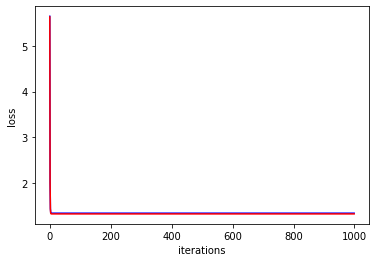

In [ ]:
plotLearningCurve()

In [ ]:
iterations = 500
parameters, history = create_nn_model(train_X.T, train_Y.T, 100, val_X.T, val_Y.T, iterations, 0.1)

iteration 0 :train_loss:5.644540309906006 val_loss5.630524635314941
iteration 1 :train_loss:4.090591907501221 val_loss4.076151371002197
iteration 2 :train_loss:3.0976579189300537 val_loss3.082883834838867
iteration 3 :train_loss:2.462721824645996 val_loss2.447685480117798
iteration 4 :train_loss:2.0569090843200684 val_loss2.0416698455810547
iteration 5 :train_loss:1.7978824377059937 val_loss1.7824856042861938
iteration 6 :train_loss:1.6328719854354858 val_loss1.6173566579818726
iteration 7 :train_loss:1.5280131101608276 val_loss1.5124086141586304
iteration 8 :train_loss:1.4615623950958252 val_loss1.4458918571472168
iteration 9 :train_loss:1.419572353363037 val_loss1.4038522243499756
iteration 10 :train_loss:1.393110752105713 val_loss1.3773548603057861
iteration 11 :train_loss:1.376478672027588 val_loss1.3606953620910645
iteration 12 :train_loss:1.3660470247268677 val_loss1.3502435684204102
iteration 13 :train_loss:1.3595166206359863 val_loss1.343697428703308
iteration 14 :train_loss:1.

In [ ]:
predY=predict(parameters, test_X.T)
MAPE = MAPE(test_Y,predY)
print("MAPE:",MAPE)

tf.Tensor([[2.0669248 2.072769  2.0689201 ... 2.0752263 2.0818286 2.072154 ]], shape=(1, 3000), dtype=float32)
MAPE: tf.Tensor(60.68107, shape=(), dtype=float32)


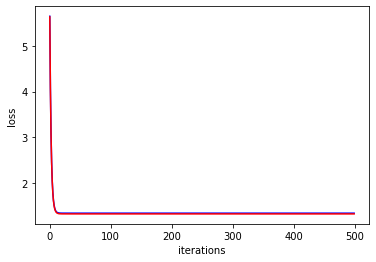

In [ ]:
plotLearningCurve()

In [ ]:
iterations = 100
parameters, history = create_nn_model(train_X.T, train_Y.T, 100, val_X.T, val_Y.T, iterations, 0.01)

iteration 0 :train_loss:5.644540309906006 val_loss5.630524635314941
iteration 1 :train_loss:5.473517417907715 val_loss5.459460735321045
iteration 2 :train_loss:5.309300899505615 val_loss5.295202255249023
iteration 3 :train_loss:5.151616096496582 val_loss5.137473106384277
iteration 4 :train_loss:5.00019645690918 val_loss4.986014366149902
iteration 5 :train_loss:4.854792594909668 val_loss4.84057092666626
iteration 6 :train_loss:4.715163707733154 val_loss4.700902462005615
iteration 7 :train_loss:4.581080436706543 val_loss4.566778659820557
iteration 8 :train_loss:4.452314376831055 val_loss4.437978267669678
iteration 9 :train_loss:4.32866096496582 val_loss4.314286708831787
iteration 10 :train_loss:4.209910869598389 val_loss4.195502281188965
iteration 11 :train_loss:4.095871448516846 val_loss4.081428527832031
iteration 12 :train_loss:3.9863531589508057 val_loss3.971876382827759
iteration 13 :train_loss:3.8811779022216797 val_loss3.866668701171875
iteration 14 :train_loss:3.780172824859619 va

In [ ]:
predY=predict(parameters, test_X.T)
MAPE = MAPE(test_Y,predY)
print("MAPE:",MAPE)

tf.Tensor([[1.8103437 1.8021277 1.8000603 ... 1.8085947 1.8119953 1.8019692]], shape=(1, 3000), dtype=float32)
MAPE: tf.Tensor(51.5707, shape=(), dtype=float32)


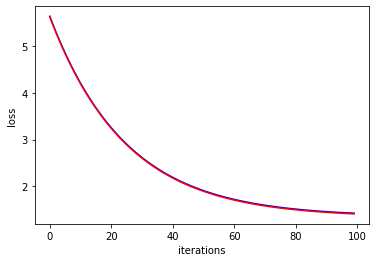

In [ ]:
plotLearningCurve()

In [ ]:
iterations = 500
parameters, history = create_nn_model(train_X.T, train_Y.T, 100, val_X.T, val_Y.T, iterations, 0.01)

iteration 0 :train_loss:5.644540309906006 val_loss5.630524635314941
iteration 1 :train_loss:5.473517417907715 val_loss5.459460735321045
iteration 2 :train_loss:5.309300899505615 val_loss5.295202255249023
iteration 3 :train_loss:5.151616096496582 val_loss5.137473106384277
iteration 4 :train_loss:5.00019645690918 val_loss4.986014366149902
iteration 5 :train_loss:4.854792594909668 val_loss4.84057092666626
iteration 6 :train_loss:4.715163707733154 val_loss4.700902462005615
iteration 7 :train_loss:4.581080436706543 val_loss4.566778659820557
iteration 8 :train_loss:4.452314376831055 val_loss4.437978267669678
iteration 9 :train_loss:4.32866096496582 val_loss4.314286708831787
iteration 10 :train_loss:4.209910869598389 val_loss4.195502281188965
iteration 11 :train_loss:4.095871448516846 val_loss4.081428527832031
iteration 12 :train_loss:3.9863531589508057 val_loss3.971876382827759
iteration 13 :train_loss:3.8811779022216797 val_loss3.866668701171875
iteration 14 :train_loss:3.780172824859619 va

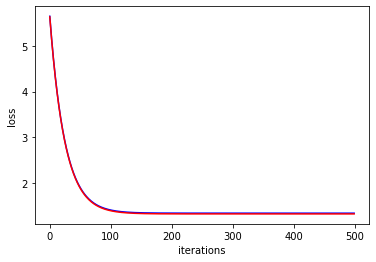

In [ ]:
plotLearningCurve()

In [ ]:
predY=predict(parameters, test_X.T)
MAPE = MAPE(test_Y,predY)
print("MAPE:",MAPE)

tf.Tensor([[2.0654123 2.0676706 2.059299  ... 2.0749414 2.0839307 2.0655203]], shape=(1, 3000), dtype=float32)
MAPE: tf.Tensor(60.697754, shape=(), dtype=float32)


In [ ]:
iterations = 500
parameters, history = create_nn_model(train_X.T, train_Y.T, 50, val_X.T, val_Y.T, iterations, 0.01)

iteration 0 :train_loss:5.644177436828613 val_loss5.630143165588379
iteration 1 :train_loss:5.473613262176514 val_loss5.459537029266357
iteration 2 :train_loss:5.309814929962158 val_loss5.2957000732421875
iteration 3 :train_loss:5.152515888214111 val_loss5.138360977172852
iteration 4 :train_loss:5.001450538635254 val_loss4.987259864807129
iteration 5 :train_loss:4.8563761711120605 val_loss4.842148780822754
iteration 6 :train_loss:4.71705436706543 val_loss4.702790260314941
iteration 7 :train_loss:4.583254337310791 val_loss4.568953990936279
iteration 8 :train_loss:4.454756736755371 val_loss4.4404215812683105
iteration 9 :train_loss:4.3313517570495605 val_loss4.316983222961426
iteration 10 :train_loss:4.212837219238281 val_loss4.1984333992004395
iteration 11 :train_loss:4.099016189575195 val_loss4.0845818519592285
iteration 12 :train_loss:3.9897048473358154 val_loss3.975238084793091
iteration 13 :train_loss:3.8847265243530273 val_loss3.870224952697754
iteration 14 :train_loss:3.7839028835

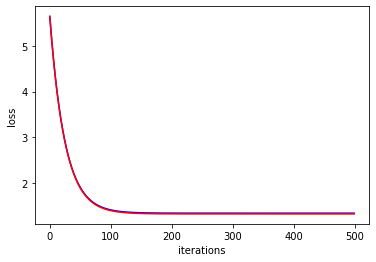

In [ ]:
plotLearningCurve()

In [ ]:
predY=predict(parameters, test_X.T)
print("Pred_Y:",predY)
MAPE = MAPE(test_Y,predY)
print("MAPE:",MAPE)

tf.Tensor([[2.065869  2.0675807 2.064593  ... 2.0725608 2.0759635 2.0660887]], shape=(1, 3000), dtype=float32)
Pred_Y: tf.Tensor([[2.065869  2.0675807 2.064593  ... 2.0725608 2.0759635 2.0660887]], shape=(1, 3000), dtype=float32)
MAPE: tf.Tensor(60.67471, shape=(), dtype=float32)


*  *** Is your model overfitting?***

Answer: No, the model is not overfitting anywhere as there is least or no differene between Validation loss and Training loss. This is evident from the learning curves above.
*   ***Does your validation loss continue to decrease all the way to the last iteration or does it flatten after a certain number of iterations? ***

Answer: Validation loss almost flattened after 100 iterations.
*   ***Does your training loss fluctuate or is it 
monotonically decreasing? ***

Answer: Training and validation loss are at same consistency as observed in the plots above and hence got flattened after cetain number of iterations.
*  *** Out of the hyperparameters you tried, what combination of learning rate, number of iterations, and the number of neurons in the hidden layer gave you the best validation loss?***

Answer: Combination of learning rate = 0.01, number of iterartions=100 and number of neurons=100 gave me the least validation loss of 51.57 percent.
As we increase iterations and changing nh, loss is being consistent with slight variation around 60 percent.


